# Linear Algebra Supplement 1


In [1]:
#we'll need these later...
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from IPython.display import Image
%matplotlib inline

## 1. Some scattered thoughts to supplement [chapter 1](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.1-Scalars-Vectors-Matrices-and-Tensors/)


### a. Review Functions
 - A function is a mapping from one set of entities to another
 - For instance, we could define a function **double_it**, which maps elements of __R__, the set of real numbers, to their doubles:
   ```
   def double_it(r):
       return 2*r
    ```
    Here, we notice a mapping: from the domain (set of inputs) of **double_it** to its co-domain (set of outputs), aka "pre-image" and "image," respectively

        1 --> 2

        2 --> 4

        3 --> 6

        4 --> 8

        etc...

  Another function may map the reals onto 1990s hiphop artists. Observe:

  ```
  def hammer(r):
    return "MC Hammer"
  ```
  Again, we see a mapping:
          1 --> TLC

          2 --> TLC

          3 --> Kriss Kross

          4 --> Busta Rhymes

          etc...

 - There exist different types of function.
   - If each member of a function's pre-image maps onto a unique element of its image, we call it "one-to-one" or "injective"
   - If every member of a function's image is mapped to by some member of its pre-image, the function is said to be "onto" or "surjective"


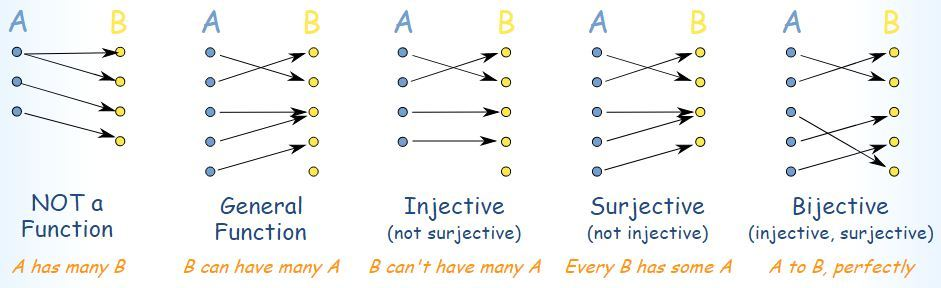

In [2]:
Image("https://i2.wp.com/www.aplustopper.com/wp-content/uploads/2016/12/one-to-one-and-onto-functions-1.jpg")


   - If a function is both one-to-one and onto (i.e., both injective and surjective), it is said to be "bijective." **A function is invertible iff it is bijective**

### b. Why did we bother reviewing functions?

 - A vector is a function
  - The vector [3, 2, 1] maps the integers 3, 2, and 1 onto their indices. In this case, the indices 0, 1, 2 are implicit.
  - More generally, a vector can be used to map words to their frequencies, temperatures to zip codes, songs to bpm, etc...
  - E.g., in the "bag of words" model, we ignore the order in which words appear in a document and instead just count up each word's occurrences:


    fulcrum --> 3

    pulchritude --> 44

    deter --> 17

   can be written [3, 44, 17] if we know which index corresponds to which word.
   - Vectors can

 - A matrix is a function
  - Matrices can stretch, bend, warp, translate, and even project onto alternative coordinate systems in other dimensions
    - We'll start to see this in Chapter 2
    - This is a leitmotif in linear algebra, so we'll continue to use this concept
 - Like functions, some matrices (but not all) are invertible


### c. How could we use Python to represent vectors? I.e., what data types might we use and why?

## 2. Fun w/ Vectors

#### Create a function to plot a vector as an arrow, extending from the origin on the Cartesian plane

In [3]:
def plot_my_vector(vec, label='A Vector'):
    ax = plt.axes();
    ax.arrow(0, 0, vec[0], vec[1], head_width=0.1, head_length=0.1, fc='k', ec='k');
    plt.title(label, size=18);
    plt.axvline(0, color='k');
    plt.axhline(0, color='k');
    plt.xlim(-3, 3);
    plt.ylim(-3, 3)
    plt.show()

#### Create a new vector and plot it

In [4]:
the_vector = np.array([0.5, 0.5])

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


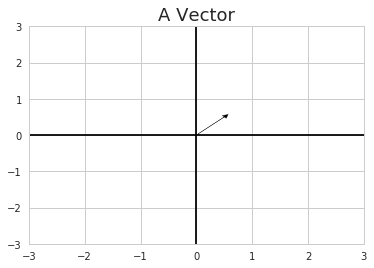

In [5]:
plot_my_vector(the_vector)

### "Vector" also means "carrier." A vector can be thought of as a force.

In [6]:
def plot_vec_addition(vecs, label='Vectors Being Vectors'):
    ax = plt.axes();
    colors = ['k', 'blue']
    anchor = [0, 0]
    for i in range(len(vecs[0])):
        ax.arrow(anchor[0], anchor[1], vecs[0][i], vecs[1][i], 
                 head_width=0.1, head_length=0.1, fc=colors[i], ec=colors[i],
                label="Vector {}".format(i));
        anchor = [vecs[0][i], vecs[1][i]]
    result = vecs.sum(axis=1)
    ax.arrow(0, 0, result[0], result[1],
            head_width=0.2, head_length=0.2, fc='purple', ec='purple',
            label="Sum");
    plt.title(label, size=18);
    plt.axvline(0, color='k');
    plt.axhline(0, color='k');
    plt.xlim(-3, 3);
    plt.ylim(-3, 3);
    ax.legend();
    plt.show()

[[ 0.5  0.5]
 [ 1.  -0.2]]


/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


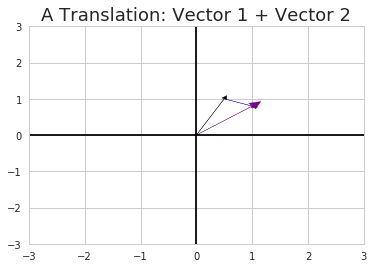

In [7]:
another_vector = [1, -.2]
two_vecs = np.stack([the_vector, another_vector])
print(two_vecs)
plot_vec_addition(two_vecs, "A Translation: Vector 1 + Vector 2")

#### More on this next time...

### Scalars are so named because they can be used to scale (i.e., stretch or contract) vectors
#### Try scaling

In [8]:
the_scalar = 2

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


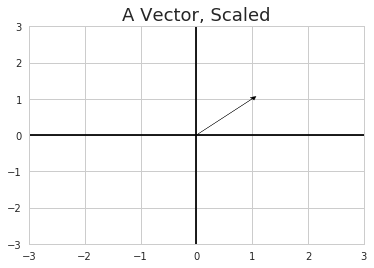

In [9]:
plot_my_vector(the_vector * the_scalar, "A Vector, Scaled")

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


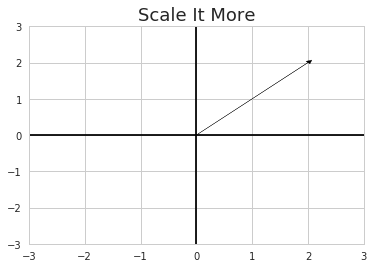

In [10]:
the_scalar = 4
plot_my_vector(the_vector * the_scalar, "Scale It More")

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


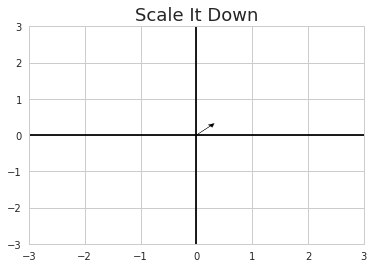

In [11]:
the_scalar = 0.5
plot_my_vector(the_vector * the_scalar, "Scale It Down")

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


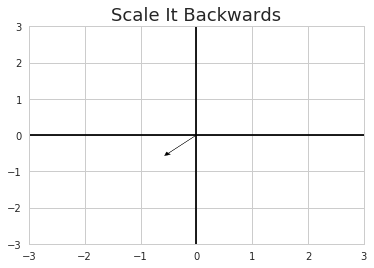

In [12]:
the_scalar = -1
plot_my_vector(the_vector * the_scalar, "Scale It Backwards")

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


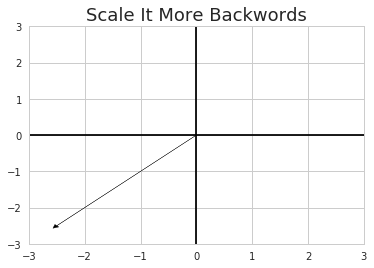

In [13]:
the_scalar = -5
plot_my_vector(the_vector * the_scalar, "Scale It More Backwords")

### Some concepts are best illustrated using several vectors. Let's make a bunch of vectors

#### [NOTE: Not every set of vectors is a vector field. Case in point: the set of vectors used below is _not_ a vector field.]

In [14]:
Xs = np.linspace(.3, .7, 100)
Ys = 2* (Xs-.5)**2 + 0.30
Xs = np.append([.35, .65], Xs)
Ys = np.append([.63, .63], Ys)
vecs = np.stack([Xs, Ys], axis=1)

In [15]:
vecs[0,:]

array([ 0.35,  0.63])

In [16]:
def plot_a_bunch(v, label="A bunch of vectors"):
    plt.plot(v[:, 0], v[:, 1], '.');
    plt.xlim(-2, 2);
    plt.ylim(-2, 2);
    plt.axvline(0, color='k');
    plt.axhline(0, color='k');
    plt.title(label, size=18);

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


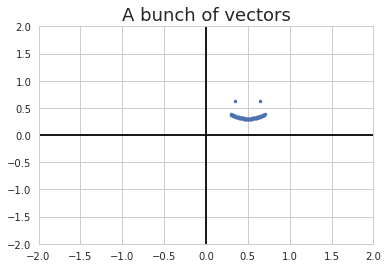

In [17]:
plot_a_bunch(vecs)

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


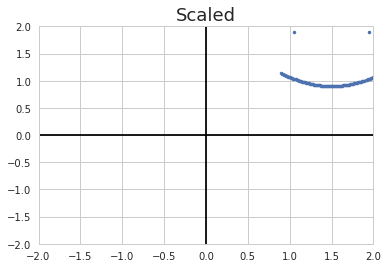

In [18]:
plot_a_bunch(vecs*3, "Scaled")

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


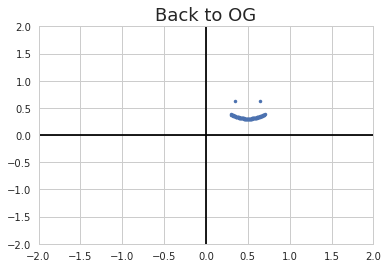

In [19]:
plot_a_bunch(vecs, "Back to OG")

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


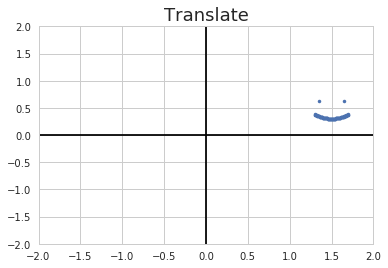

In [20]:
carriers = np.stack([np.ones(vecs.shape[0]),
                    np.zeros(vecs.shape[0])]).T
plot_a_bunch(vecs+carriers, "Translate")

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


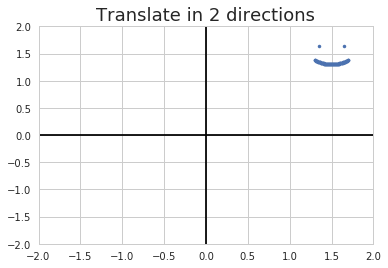

In [21]:
carriers = np.stack([np.ones(vecs.shape[0]),
                    np.ones(vecs.shape[0])]).T
plot_a_bunch(vecs+carriers, "Translate in 2 directions")

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


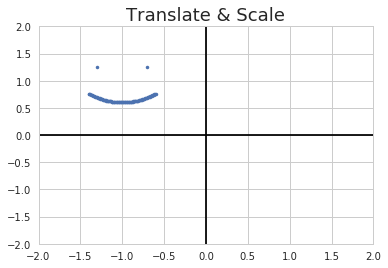

In [22]:
carriers = np.stack([np.ones(vecs.shape[0])*2,
                    np.zeros(vecs.shape[0])]).T
plot_a_bunch((vecs*2)-carriers, "Translate & Scale")